## Assignment 2
### Exercise 1
#### A)

##### General equations:

##### Forward calculations:
###### Output of every neuron:
$ y_{iμ}^{(r)} = f(\sum_{k}wij^{(r)} * y_{jμ}^{(r-1)}) $
###### Cost function:
$ E = \frac{1}{2} * \sum_{kμ} (e_{kμ})^2 $ , $  e_{kμ} = T_{kμ} - y_{kμ} ^ {(R)} $
##### Backward calculations:
###### Calculation of all deltas for each layer:
$ δ_{iμ}^{(R)} = f'(ν_{iμ}^{(R)}) * (y_{iμ}^{(R)} - T_{iμ}) $ , 
$ δ_{iμ}^{(r)} = \sum_{k} δ_{kμ}^{(r+1)} * w_{ki}^{(r+1)} * f'(ν_{iμ}^{(r)}) $
###### Weight updates:
$ w_{ij}^{(r)}(new) = w_{ij}^{(r)}(old) + δw_{ij}^{(r)} $ , $ δw_{ij}^{(r)} = -ε\sum_{μ} δ_{iμ}^{(r)} * y_{jμ}^{(r-1)} $ 
##### Activation functions:
##### i) ReLU
$ f(x) = 0 , \text{for x < 0} $ , 
$ f(x) = x , \text{for x >= 0} , \text{with range (0 to max(x))} $ , 
$ f'(x) = 0 , \text{for x < 0} , f'(x) = 1 , \text{for x >= 0} $  
##### ii) Hyperbolic tangent
$ f(x) = \frac{1 - e ^ {-2x}}{1 + e ^ {-2x}} , \text{with range (-1 to 1)} , f'(x) = (\frac{2}{e ^ {x} + e ^ {-x}}) ^ 2 $
##### iii) sigmoid
$ f(x) = \frac{1}{1 + e ^ {-x}} , \text{with range (0 to 1)} , f'(x) = ({e ^ {\frac{x}{2}} + e ^ {-\frac{x}{2}}}) ^ 2 , \text{with range [0, +infinity)} $

In [1]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import keras.layers as l
import keras.optimizers as o
import keras.models as m
import keras
from keras.utils import to_categorical
import keras.backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.datasets import mnist
from scipy.io import loadmat
import keras.callbacks as c
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import confusion_matrix
import cv2 as cv
from skimage.transform import resize
from keras.preprocessing.image import ImageDataGenerator
import math
import seaborn as sns
np.random.seed(int(time.time()))

%matplotlib inline

Using TensorFlow backend.


#### B)

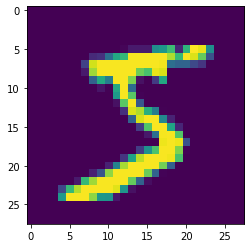

In [2]:
# load mnist data
(x_train,y_train), (x_test,y_test) = mnist.load_data()
# rescale pixel values
x_train = (1/255.0)*x_train
x_test = (1/255.0)*x_test
# labels -> one-hot encodings
y_train = to_categorical(y_train.reshape([-1, 1]))
y_test = to_categorical(y_test.reshape([-1, 1]))
plt.imshow(x_train[0])

In [3]:
# create class NeuralNetwork
class NeuralNetwork:
    
    def __init__(self, activationFunction, layers):
        self.activationFunction = activationFunction
        self.layers = layers
        self.model = None
        self.units = 32
        
    def createModel(self):
        inputLayer = l.Input((28,28), name = "InputLayer")
        IntermediateLayer = l.Flatten()(inputLayer)
        for layer in range(0, (self.layers - 1)):
            IntermediateLayer = l.Dense(self.units, activation = self.activationFunction, name = "IntermediateLayer" + str(layer))(IntermediateLayer)
        outputLayer = l.Dense(10, activation = "softmax", name = "OutputLayer")(IntermediateLayer)
        self.model = m.Model(inputLayer, outputLayer)
        self.model.name = "NeuralNetwork" + str(self.activationFunction).upper() + str(self.layers)
        self.model.summary()
        print("Number of layers created: " + str(len(self.model.layers)))
        
    def compileModel(self, learningRate, loss):
        self.model.compile(optimizer = o.SGD(lr = learningRate), loss = loss, metrics = ['accuracy'])
        
    def fitModel(self, x_train, y_train, epochs, validation_data):
        return self.model.fit(x_train, y_train, epochs=epochs, validation_data = validation_data)
    
    def getMaxGradients(self, inputSet, outputSet):
        outputGradients = self.getGradients(inputSet, outputSet)
        maxGradientsWeights = []
        maxGradientsBiases = []
        for i,_ in enumerate(outputGradients):
            if len(outputGradients[i].shape) == 2:
                maxGradientLayer_i = np.max(outputGradients[i])
                maxGradientsWeights.append(maxGradientLayer_i)
            else:
                maxGradientLayer_i = np.max(outputGradients[i])
                maxGradientsBiases.append(maxGradientLayer_i)
        return (maxGradientsWeights, maxGradientsBiases)
    
    def getGradients(self, inputSet, outputSet):
        gradients = self.model.optimizer.get_gradients(self.model.total_loss, self.model.trainable_weights)
        symbInputs = (self.model._feed_inputs + self.model._feed_targets + self.model._feed_sample_weights)
        f = K.function(symbInputs, gradients)
        x, y, weight = self.model._standardize_user_data(inputSet, outputSet)
        outputGradients = f(x + y + weight)
        return np.array(outputGradients)

In [4]:
keras.backend.clear_session()

epochs = 3
# define model, compile and fit
# activation function = relu, layers = 5
activationFunction = 'relu'
layers = 5
neuralNetworkRELU5 = NeuralNetwork(activationFunction, layers)
neuralNetworkRELU5.createModel()
neuralNetworkRELU5.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkRELU5History = neuralNetworkRELU5.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = tanh, layers = 5
activationFunction = 'tanh'
layers = 5
neuralNetworkTANH5 = NeuralNetwork(activationFunction, layers)
neuralNetworkTANH5.createModel()
neuralNetworkTANH5.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkTANH5History = neuralNetworkTANH5.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = tanh, layers = 5
activationFunction = 'sigmoid'
layers = 5
neuralNetworkSIGMOID5 = NeuralNetwork(activationFunction, layers)
neuralNetworkSIGMOID5.createModel()
neuralNetworkSIGMOID5.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkSIGMOID5History = neuralNetworkSIGMOID5.fitModel(x_train, y_train, epochs, (x_test, y_test))

Model: "NeuralNetworkRELU5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
IntermediateLayer0 (Dense)   (None, 32)                25120     
_________________________________________________________________
IntermediateLayer1 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer2 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer3 (Dense)   (None, 32)                1056      
_________________________________________________________________
OutputLayer (Dense)          (None, 10)         

In [5]:
epochs = 3
# define model, compile and fit
# activation function = relu, layers = 20
activationFunction = 'relu'
layers = 20
neuralNetworkRELU20 = NeuralNetwork(activationFunction, layers)
neuralNetworkRELU20.createModel()
neuralNetworkRELU20.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkRELU20History = neuralNetworkRELU20.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = tanh, layers = 20
activationFunction = 'tanh'
layers = 20
neuralNetworkTANH20 = NeuralNetwork(activationFunction, layers)
neuralNetworkTANH20.createModel()
neuralNetworkTANH20.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkTANH20History = neuralNetworkTANH20.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = sigmoid, layers = 20
activationFunction = 'sigmoid'
layers = 20
neuralNetworkSIGMOID20 = NeuralNetwork(activationFunction, layers)
neuralNetworkSIGMOID20.createModel()
neuralNetworkSIGMOID20.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkSIGMOID20History = neuralNetworkSIGMOID20.fitModel(x_train, y_train, epochs, (x_test, y_test))

Model: "NeuralNetworkRELU20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 28, 28)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
IntermediateLayer0 (Dense)   (None, 32)                25120     
_________________________________________________________________
IntermediateLayer1 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer2 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer3 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer4 (Dense)   (None, 32)        

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 72s 1ms/step - loss: 2.3102 - accuracy: 0.1111 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/3
60000/60000 [==============================] - 12s 204us/step - loss: 2.3019 - accuracy: 0.1112 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/3
60000/60000 [==============================] - 64s 1ms/step - loss: 2.3019 - accuracy: 0.1112 - val_loss: 2.3017 - val_accuracy: 0.1135


In [6]:
epochs = 3
# define model, compile and fit
# activation function = relu, layers = 40
activationFunction = 'relu'
layers = 40
neuralNetworkRELU40 = NeuralNetwork(activationFunction, layers)
neuralNetworkRELU40.createModel()
neuralNetworkRELU40.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkRELU40History = neuralNetworkRELU40.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = tanh, layers = 40
activationFunction = 'tanh'
layers = 40
neuralNetworkTANH40 = NeuralNetwork(activationFunction, layers)
neuralNetworkTANH40.createModel()
neuralNetworkTANH40.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkTANH40History = neuralNetworkTANH40.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = sigmoid, layers = 40
activationFunction = 'sigmoid'
layers = 40
neuralNetworkSIGMOID40 = NeuralNetwork(activationFunction, layers)
neuralNetworkSIGMOID40.createModel()
neuralNetworkSIGMOID40.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkSIGMOID40History = neuralNetworkSIGMOID40.fitModel(x_train, y_train, epochs, (x_test, y_test))

Model: "NeuralNetworkRELU40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 28, 28)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
IntermediateLayer0 (Dense)   (None, 32)                25120     
_________________________________________________________________
IntermediateLayer1 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer2 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer3 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer4 (Dense)   (None, 32)        

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 218us/step - loss: 1.0731 - accuracy: 0.6593 - val_loss: 0.6363 - val_accuracy: 0.8373
Epoch 2/3
60000/60000 [==============================] - 12s 197us/step - loss: 0.4914 - accuracy: 0.8824 - val_loss: 0.4394 - val_accuracy: 0.8989
Epoch 3/3
60000/60000 [==============================] - 39s 655us/step - loss: 0.3681 - accuracy: 0.9140 - val_loss: 0.3382 - val_accuracy: 0.9221
Model: "NeuralNetworkSIGMOID40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 28, 28)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
IntermediateLayer0 (Dense)   (None, 32)                25120     
____________

#### C)

In [7]:
neuralNetworkRELU5MaxGrads = neuralNetworkRELU5.getMaxGradients(x_train, y_train)
neuralNetworkTANH5MaxGrads = neuralNetworkTANH5.getMaxGradients(x_train, y_train)
neuralNetworkSIGMOID5MaxGrads = neuralNetworkSIGMOID5.getMaxGradients(x_train, y_train)

neuralNetworkRELU20MaxGrads = neuralNetworkRELU20.getMaxGradients(x_train, y_train)
neuralNetworkTANH20MaxGrads = neuralNetworkTANH20.getMaxGradients(x_train, y_train)
neuralNetworkSIGMOID20MaxGrads = neuralNetworkSIGMOID20.getMaxGradients(x_train, y_train)

neuralNetworkRELU40MaxGrads = neuralNetworkRELU40.getMaxGradients(x_train, y_train)
neuralNetworkTANH40MaxGrads = neuralNetworkTANH40.getMaxGradients(x_train, y_train)
neuralNetworkSIGMOID40MaxGrads = neuralNetworkSIGMOID40.getMaxGradients(x_train, y_train)

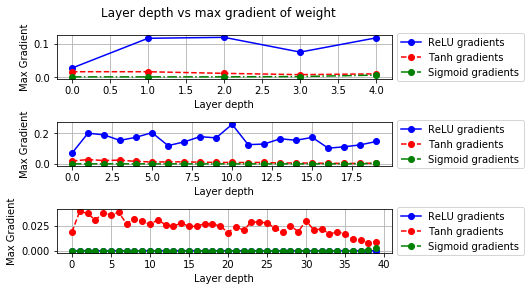

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Layer depth vs max gradient of weight')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.plot(neuralNetworkRELU5MaxGrads[0], 'o-b', label = 'ReLU gradients')
ax1.plot(neuralNetworkTANH5MaxGrads[0], 'o--r', label = 'Tanh gradients')
ax1.plot(neuralNetworkSIGMOID5MaxGrads[0], 'o-.g', label = 'Sigmoid gradients')
ax2.plot(neuralNetworkRELU20MaxGrads[0], 'o-b', label = 'ReLU gradients')
ax2.plot(neuralNetworkTANH20MaxGrads[0], 'o--r', label = 'Tanh gradients')
ax2.plot(neuralNetworkSIGMOID20MaxGrads[0], 'o-.g', label = 'Sigmoid gradients')
ax3.plot(neuralNetworkRELU40MaxGrads[0], 'o-b', label = 'ReLU gradients')
ax3.plot(neuralNetworkTANH40MaxGrads[0], 'o--r', label = 'Tanh gradients')
ax3.plot(neuralNetworkSIGMOID40MaxGrads[0], 'o-.g', label = 'Sigmoid gradients')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Layer depth')
ax1.set_ylabel('Max Gradient')
ax2.set_xlabel('Layer depth')
ax2.set_ylabel('Max Gradient')
ax3.set_xlabel('Layer depth')
ax3.set_ylabel('Max Gradient')

plt.subplots_adjust(hspace=1)
plt.show()

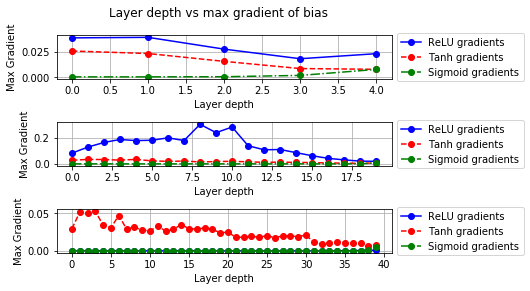

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Layer depth vs max gradient of bias')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.plot(neuralNetworkRELU5MaxGrads[1], 'o-b', label = 'ReLU gradients')
ax1.plot(neuralNetworkTANH5MaxGrads[1], 'o--r', label = 'Tanh gradients')
ax1.plot(neuralNetworkSIGMOID5MaxGrads[1], 'o-.g', label = 'Sigmoid gradients')
ax2.plot(neuralNetworkRELU20MaxGrads[1], 'o-b', label = 'ReLU gradients')
ax2.plot(neuralNetworkTANH20MaxGrads[1], 'o--r', label = 'Tanh gradients')
ax2.plot(neuralNetworkSIGMOID20MaxGrads[1], 'o-.g', label = 'Sigmoid gradients')
ax3.plot(neuralNetworkRELU40MaxGrads[1], 'o-b', label = 'ReLU gradients')
ax3.plot(neuralNetworkTANH40MaxGrads[1], 'o--r', label = 'Tanh gradients')
ax3.plot(neuralNetworkSIGMOID40MaxGrads[1], 'o-.g', label = 'Sigmoid gradients')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Layer depth')
ax1.set_ylabel('Max Gradient')
ax2.set_xlabel('Layer depth')
ax2.set_ylabel('Max Gradient')
ax3.set_xlabel('Layer depth')
ax3.set_ylabel('Max Gradient')

plt.subplots_adjust(hspace=1)
plt.show()

#### D)

In [10]:
# Create LeCun activation function
def LeCunActivationFunction(x):
    return (1.7159 * K.tanh((2/3) * x) + 0.001 * x)

get_custom_objects().update({'LeCun': l.Activation(LeCunActivationFunction)})

In [11]:
epochs = 3
# define model, compile and fit
# activation function = LeCun, layers = 5
activationFunction = 'LeCun'
layers = 5
neuralNetworkLECUN5 = NeuralNetwork(activationFunction, layers)
neuralNetworkLECUN5.createModel()
neuralNetworkLECUN5.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkLECUN5History = neuralNetworkLECUN5.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = LeCun, layers = 20
activationFunction = 'LeCun'
layers = 20
neuralNetworkLECUN20 = NeuralNetwork(activationFunction, layers)
neuralNetworkLECUN20.createModel()
neuralNetworkLECUN20.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkLECUN20History = neuralNetworkLECUN20.fitModel(x_train, y_train, epochs, (x_test, y_test))

# define model, compile and fit
# activation function = LeCun, layers = 40
activationFunction = 'LeCun'
layers = 40
neuralNetworkLECUN40 = NeuralNetwork(activationFunction, layers)
neuralNetworkLECUN40.createModel()
neuralNetworkLECUN40.compileModel(0.01, 'categorical_crossentropy')
neuralNetworkLECUN40History = neuralNetworkLECUN40.fitModel(x_train, y_train, epochs, (x_test, y_test))

Model: "NeuralNetworkLECUN5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      (None, 28, 28)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
IntermediateLayer0 (Dense)   (None, 32)                25120     
_________________________________________________________________
IntermediateLayer1 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer2 (Dense)   (None, 32)                1056      
_________________________________________________________________
IntermediateLayer3 (Dense)   (None, 32)                1056      
_________________________________________________________________
OutputLayer (Dense)          (None, 10)        

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 50s 827us/step - loss: 0.7553 - accuracy: 0.7628 - val_loss: 0.4103 - val_accuracy: 0.8877
Epoch 2/3
60000/60000 [==============================] - 63s 1ms/step - loss: 0.3427 - accuracy: 0.9093 - val_loss: 0.2763 - val_accuracy: 0.9276
Epoch 3/3
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2600 - accuracy: 0.9319 - val_loss: 0.2432 - val_accuracy: 0.9352


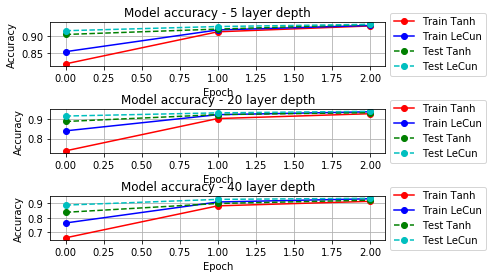

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.plot(neuralNetworkTANH5History.history['accuracy'], 'o-r', label = 'Train Tanh')
ax1.plot(neuralNetworkLECUN5History.history['accuracy'], 'o-b', label = 'Train LeCun')
ax1.plot(neuralNetworkTANH5History.history['val_accuracy'], 'o--g', label = 'Test Tanh')
ax1.plot(neuralNetworkLECUN5History.history['val_accuracy'], 'o--c', label = 'Test LeCun')
ax2.plot(neuralNetworkTANH20History.history['accuracy'], 'o-r', label = 'Train Tanh')
ax2.plot(neuralNetworkLECUN20History.history['accuracy'], 'o-b', label = 'Train LeCun')
ax2.plot(neuralNetworkTANH20History.history['val_accuracy'], 'o--g', label = 'Test Tanh')
ax2.plot(neuralNetworkLECUN20History.history['val_accuracy'], 'o--c', label = 'Test LeCun')
ax3.plot(neuralNetworkTANH40History.history['accuracy'], 'o-r', label = 'Train Tanh')
ax3.plot(neuralNetworkLECUN40History.history['accuracy'], 'o-b', label = 'Train LeCun')
ax3.plot(neuralNetworkTANH40History.history['val_accuracy'], 'o--g', label = 'Test Tanh')
ax3.plot(neuralNetworkLECUN40History.history['val_accuracy'], 'o--c', label = 'Test LeCun')
ax1.set_title('Model accuracy - 5 layer depth')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax2.set_title('Model accuracy - 20 layer depth')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax3.set_title('Model accuracy - 40 layer depth')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')

plt.subplots_adjust(hspace=1)
plt.show()

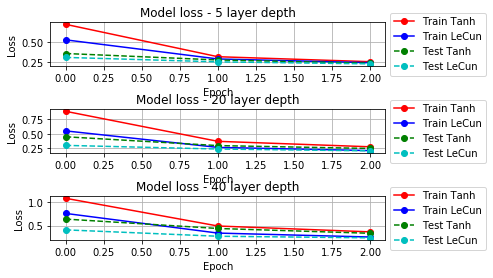

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.plot(neuralNetworkTANH5History.history['loss'], 'o-r', label = 'Train Tanh')
ax1.plot(neuralNetworkLECUN5History.history['loss'], 'o-b', label = 'Train LeCun')
ax1.plot(neuralNetworkTANH5History.history['val_loss'], 'o--g', label = 'Test Tanh')
ax1.plot(neuralNetworkLECUN5History.history['val_loss'], 'o--c', label = 'Test LeCun')
ax2.plot(neuralNetworkTANH20History.history['loss'], 'o-r', label = 'Train Tanh')
ax2.plot(neuralNetworkLECUN20History.history['loss'], 'o-b', label = 'Train LeCun')
ax2.plot(neuralNetworkTANH20History.history['val_loss'], 'o--g', label = 'Test Tanh')
ax2.plot(neuralNetworkLECUN20History.history['val_loss'], 'o--c', label = 'Test LeCun')
ax3.plot(neuralNetworkTANH40History.history['loss'], 'o-r', label = 'Train Tanh')
ax3.plot(neuralNetworkLECUN40History.history['loss'], 'o-b', label = 'Train LeCun')
ax3.plot(neuralNetworkTANH40History.history['val_loss'], 'o--g', label = 'Test Tanh')
ax3.plot(neuralNetworkLECUN40History.history['val_loss'], 'o--c', label = 'Test LeCun')
ax1.set_title('Model loss - 5 layer depth')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_title('Model loss - 20 layer depth')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax3.set_title('Model loss - 40 layer depth')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')

plt.subplots_adjust(hspace=1)
plt.show()

##### All equations are similar as A) subproblem. The only thing that changes is the activation function.

##### Activation function:
$ f(x) = 1.7159 * tanh(\frac{2}{3}x) + 0.01*x , \text{with range (-2 to 2)} , f'(x) = 1.14393 * sech^2(\frac{2}{3}x) + 0.01 $

In [14]:
neuralNetworkTANH5MaxGrads = neuralNetworkTANH5.getMaxGradients(x_test, y_test)
neuralNetworkTANH20MaxGrads = neuralNetworkTANH20.getMaxGradients(x_test, y_test)
neuralNetworkTANH40MaxGrads = neuralNetworkTANH40.getMaxGradients(x_test, y_test)

neuralNetworkLECUN5MaxGrads = neuralNetworkLECUN5.getMaxGradients(x_test, y_test)
neuralNetworkLECUN20MaxGrads = neuralNetworkLECUN20.getMaxGradients(x_test, y_test)
neuralNetworkLECUN40MaxGrads = neuralNetworkLECUN40.getMaxGradients(x_test, y_test)

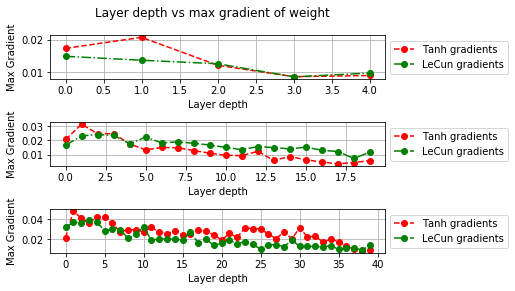

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Layer depth vs max gradient of weight')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.plot(neuralNetworkTANH5MaxGrads[0], 'o--r', label = 'Tanh gradients')
ax1.plot(neuralNetworkLECUN5MaxGrads[0], 'o-.g', label = 'LeCun gradients')
ax2.plot(neuralNetworkTANH20MaxGrads[0], 'o--r', label = 'Tanh gradients')
ax2.plot(neuralNetworkLECUN20MaxGrads[0], 'o-.g', label = 'LeCun gradients')
ax3.plot(neuralNetworkTANH40MaxGrads[0], 'o--r', label = 'Tanh gradients')
ax3.plot(neuralNetworkLECUN40MaxGrads[0], 'o-.g', label = 'LeCun gradients')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Layer depth')
ax1.set_ylabel('Max Gradient')
ax2.set_xlabel('Layer depth')
ax2.set_ylabel('Max Gradient')
ax3.set_xlabel('Layer depth')
ax3.set_ylabel('Max Gradient')

plt.subplots_adjust(hspace=1)
plt.show()

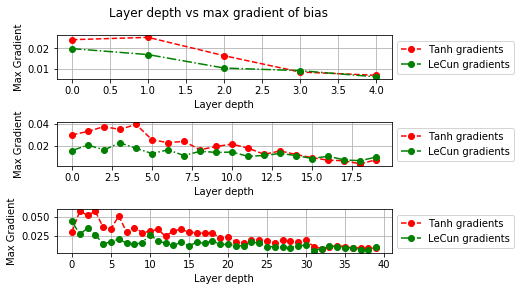

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Layer depth vs max gradient of bias')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

ax1.plot(neuralNetworkTANH5MaxGrads[1], 'o--r', label = 'Tanh gradients')
ax1.plot(neuralNetworkLECUN5MaxGrads[1], 'o-.g', label = 'LeCun gradients')
ax2.plot(neuralNetworkTANH20MaxGrads[1], 'o--r', label = 'Tanh gradients')
ax2.plot(neuralNetworkLECUN20MaxGrads[1], 'o-.g', label = 'LeCun gradients')
ax3.plot(neuralNetworkTANH40MaxGrads[1], 'o--r', label = 'Tanh gradients')
ax3.plot(neuralNetworkLECUN40MaxGrads[1], 'o-.g', label = 'LeCun gradients')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Layer depth')
ax1.set_ylabel('Max Gradient')
ax2.set_xlabel('Layer depth')
ax2.set_ylabel('Max Gradient')
ax3.set_xlabel('Layer depth')
ax3.set_ylabel('Max Gradient')

plt.subplots_adjust(hspace=1)
plt.show()

### Exercise 2
#### A)

In [114]:
# preprocess svhn data
SVHN_directory_train = "train_32x32.mat"
SVHN_directory_test = "test_32x32.mat"

# load .mat file
train_raw = loadmat(SVHN_directory_train)
test_raw = loadmat(SVHN_directory_test)
x_train = np.array(train_raw['X'])
y_train = train_raw['y']
x_test = np.array(test_raw['X'])
y_test = test_raw['y']

# make correct shape
x_train = np.moveaxis(x_train, -1, 0)
x_test = np.moveaxis(x_test, -1, 0)

# rescale pixel values
x_train = (1/255.0)*x_train
x_test = (1/255.0)*x_test

In [115]:
# check labels
print(np.unique(y_train))
# replace label "10" with label "0"
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
print(np.unique(y_train))
print(np.unique(y_test))

[ 1  2  3  4  5  6  7  8  9 10]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Label: [9]


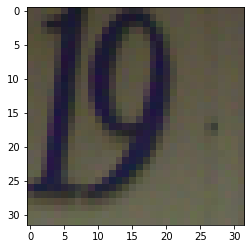

In [116]:
# check random image and label
plt.imshow(x_train[1])
print("Label: " + str(y_train[1]))

In [117]:
#one-hot encode target column
y_train = to_categorical(y_train.reshape([-1, 1]))
y_test = to_categorical(y_test.reshape([-1, 1]))

In [118]:
x_train.shape

(73257, 32, 32, 3)

In [119]:
x_test.shape

(26032, 32, 32, 3)

In [120]:
# split train set to actual train set and validation set
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size = 7326)

In [121]:
# check split
print("Shape of x_val_split: " +  str(x_val_split.shape))
print("Shape of x_train_split: " +  str(x_train_split.shape))

Shape of x_val_split: (7326, 32, 32, 3)
Shape of x_train_split: (65931, 32, 32, 3)


In [122]:
imageGenerator = ImageDataGenerator(rotation_range = 10,
                                    zoom_range = [0.95, 1.05],
                                    height_shift_range = 0.10,
                                    shear_range = 0.15)

In [123]:
# define model for CNN

keras.backend.clear_session()

modelCNN = m.Sequential([
    l.Conv2D(9, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    l.BatchNormalization(),
    l.MaxPooling2D((3,3)),
    l.Conv2D(36, (3,3), padding='same', activation='relu'),
    l.BatchNormalization(),
    l.MaxPooling2D((3,3)),
    l.Conv2D(49, (3,3), padding='same', activation='relu'),
    l.BatchNormalization(),
    l.MaxPooling2D((3,3)),
    l.Flatten(),
    l.Dense(64, activation='relu'),
    l.Dense(10, activation="softmax")
])

modelCNN.name = "CNNetwork"
earlyStopping = c.EarlyStopping(patience = 5)
modelCheckpoint = c.ModelCheckpoint('cnn_model.h5', save_best_only = True)
modelCNN.compile(optimizer = o.Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
modelCNN.summary()

Model: "CNNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 9)         252       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 9)         36        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 9)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 36)        2952      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 36)        144       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 36)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 49)          15

In [124]:
# fit model
modelCNNHistory = modelCNN.fit_generator(imageGenerator.flow(x_train_split, y_train_split, batch_size = 64),
                                         steps_per_epoch = math.ceil(len(x_train_split) / 64),
                                         epochs = 50, 
                                         validation_data = (x_val_split, y_val_split), 
                                         callbacks = [earlyStopping, modelCheckpoint])

Epoch 1/50
1031/1031 [==============================] - 361s 350ms/step - loss: 1.2170 - accuracy: 0.5863 - val_loss: 0.8438 - val_accuracy: 0.7387
Epoch 2/50
1031/1031 [==============================] - 98s 95ms/step - loss: 0.7269 - accuracy: 0.7696 - val_loss: 0.6125 - val_accuracy: 0.8126
Epoch 3/50
1031/1031 [==============================] - 97s 94ms/step - loss: 0.6345 - accuracy: 0.7994 - val_loss: 0.6797 - val_accuracy: 0.7865
Epoch 4/50
1031/1031 [==============================] - 95s 92ms/step - loss: 0.5851 - accuracy: 0.8157 - val_loss: 0.5141 - val_accuracy: 0.8391
Epoch 5/50
1031/1031 [==============================] - 109s 106ms/step - loss: 0.5580 - accuracy: 0.8257 - val_loss: 0.5027 - val_accuracy: 0.8463
Epoch 6/50
1031/1031 [==============================] - 121s 118ms/step - loss: 0.5362 - accuracy: 0.8325 - val_loss: 0.4574 - val_accuracy: 0.8582
Epoch 7/50
1031/1031 [==============================] - 111s 107ms/step - loss: 0.5198 - accuracy: 0.8386 - val_loss: 

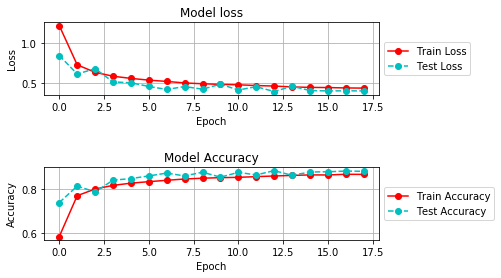

In [125]:
# figure losses and accuracies
fig, (ax1, ax2) = plt.subplots(2)
ax1.grid(True)
ax2.grid(True)

ax1.plot(modelCNNHistory.history['loss'], 'o-r', label = 'Train Loss')
ax1.plot(modelCNNHistory.history['val_loss'], 'o--c', label = 'Test Loss')
ax2.plot(modelCNNHistory.history['accuracy'], 'o-r', label = 'Train Accuracy')
ax2.plot(modelCNNHistory.history['val_accuracy'], 'o--c', label = 'Test Accuracy')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax1.set_title('Model loss')
ax2.set_title('Model Accuracy')

plt.subplots_adjust(hspace=1)
plt.show()

In [126]:
# predict classes on test sample
loss, accuracy = modelCNN.evaluate(x = x_test, y = y_test, verbose=0)
print("Loss: " + str(loss) + " ,accuracy: " + str(accuracy))

Loss: 0.4027043507762423 ,accuracy: 0.8833358883857727


In [127]:
# predict the labels of x_train_split and inverseone-hot encoding
y_pred_split = modelCNN.predict(x_train_split)
y_pred_split = np.argmax(y_pred_split, axis=-1)
y_train_split = np.argmax(y_train_split, axis=-1)

In [128]:
print(y_train[0])
print(x_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0.12941176 0.11764706 0.14901961]
  [0.05882353 0.09019608 0.0745098 ]
  [0.05882353 0.06666667 0.0745098 ]
  ...
  [0.28235294 0.25490196 0.21960784]
  [0.32156863 0.30196078 0.22352941]
  [0.34901961 0.30980392 0.23137255]]

 [[0.10980392 0.15294118 0.1372549 ]
  [0.05490196 0.09803922 0.08627451]
  [0.05490196 0.07843137 0.06666667]
  ...
  [0.15686275 0.15294118 0.19607843]
  [0.2627451  0.22745098 0.20392157]
  [0.3254902  0.30588235 0.23529412]]

 [[0.15686275 0.16078431 0.14901961]
  [0.07058824 0.08235294 0.10196078]
  [0.0627451  0.06666667 0.09019608]
  ...
  [0.09019608 0.11372549 0.17647059]
  [0.1372549  0.16470588 0.17254902]
  [0.28235294 0.27058824 0.20784314]]

 ...

 [[0.3372549  0.31764706 0.29411765]
  [0.34117647 0.32156863 0.27843137]
  [0.32156863 0.30980392 0.25490196]
  ...
  [0.40784314 0.40784314 0.34117647]
  [0.40784314 0.41176471 0.31764706]
  [0.40392157 0.41176471 0.30588235]]

 [[0.32941176 0.3372549  0.25098039]
  [0.

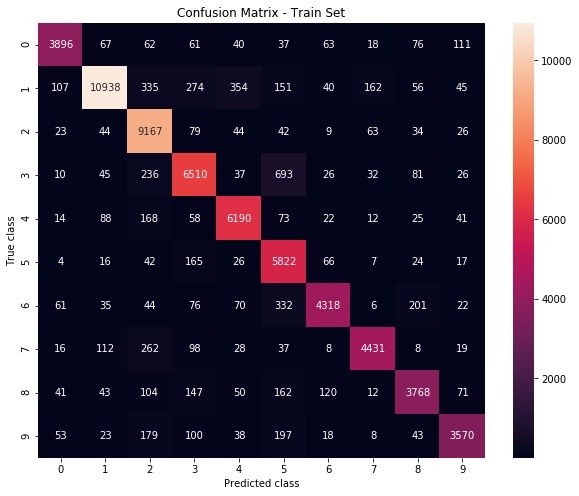

In [129]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_train_split, y_pred_split)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

#### B)

In [130]:
# Get convolutional layers
convLayers = [modelCNN.get_layer('conv2d_1'), modelCNN.get_layer('conv2d_2'), modelCNN.get_layer('conv2d_3')]
convOutputs = [convLayer.output for convLayer in convLayers]
activationModel = m.Model(inputs = modelCNN.input, outputs = convOutputs)
convNames = [convLayer.name for convLayer in convLayers]

In [131]:
# Define a function which will plot the convolutional filters
def visualizeConvolutionalFilters(img, imagesRow):
    
    img = np.expand_dims(img, axis=0)
    activations = activationModel.predict(img)
    
    for name, activation in zip(convNames, activations): 
        features = activation.shape[-1]
        size = activation.shape[1]
        cols = features // imagesRow
        grid = np.zeros((size * cols, imagesRow * size))
        for col in range(cols): 
            for row in range(imagesRow):
                channel_image = activation[0, :, :, col * imagesRow + row]
                channel_image -= channel_image.mean()
                channel_image *= 32
                channel_image += 49
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * grid.shape[1], scale * grid.shape[0]))
        plt.title(name)
        plt.grid(False)
        plt.imshow(grid, aspect='auto', cmap='plasma')
        plt.show()

Label 0
15


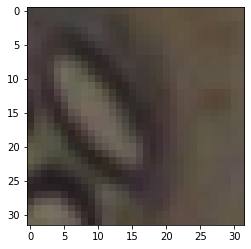

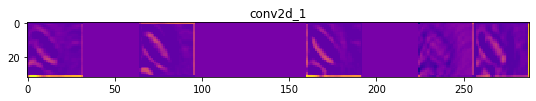

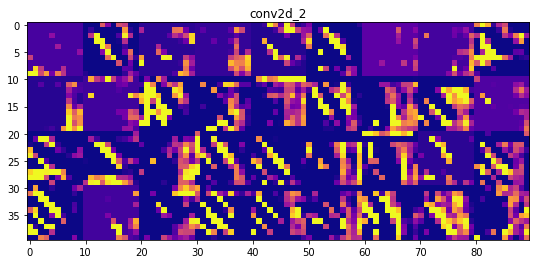

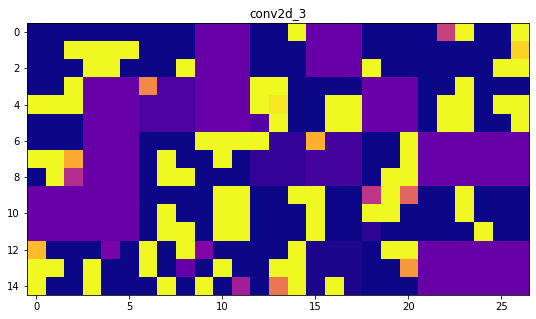

Label 1
4


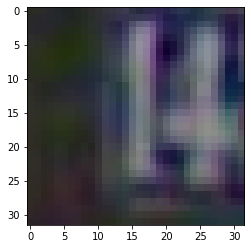

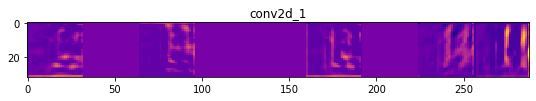

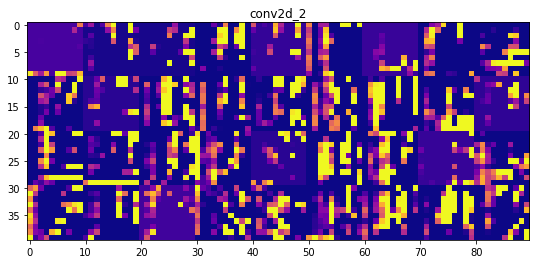

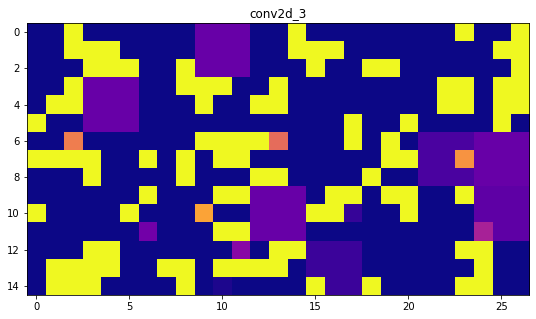

Label 2
9


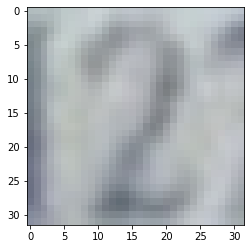

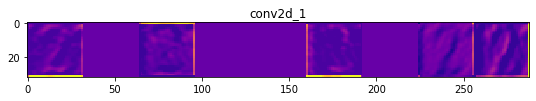

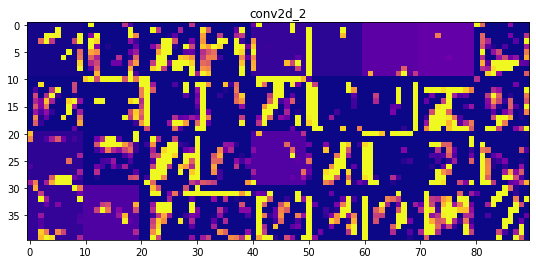

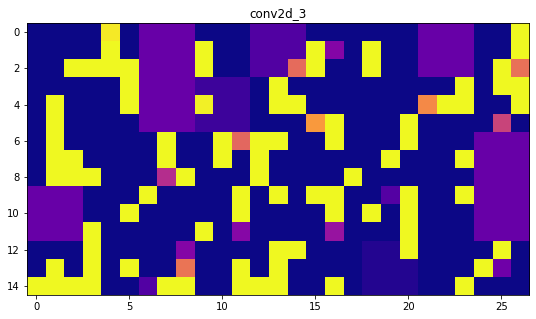

Label 3
1


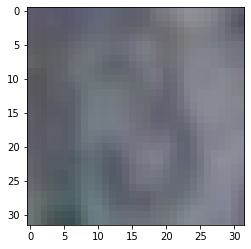

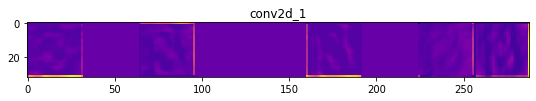

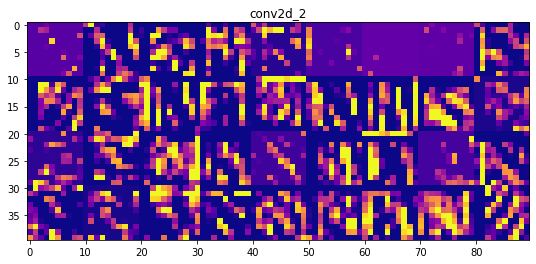

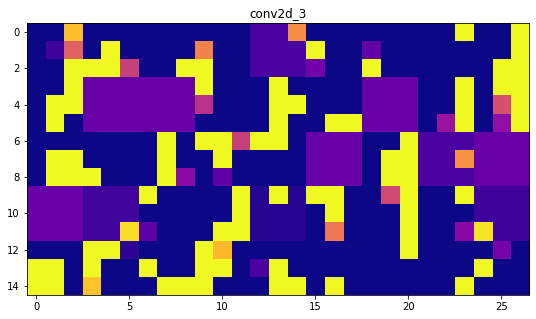

Label 4
11


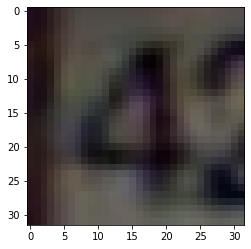

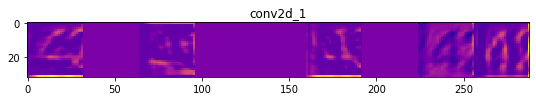

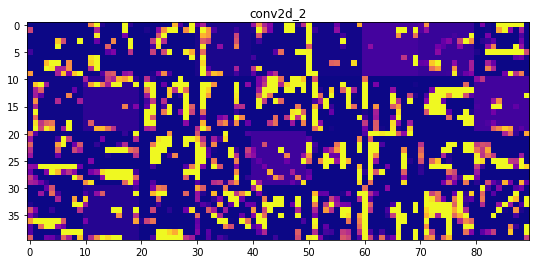

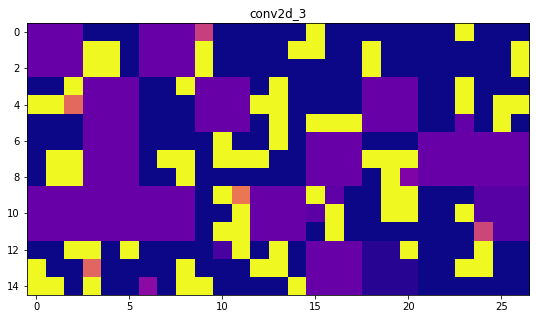

Label 5
21


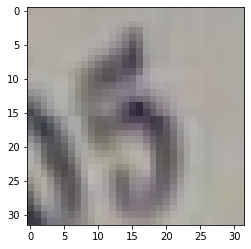

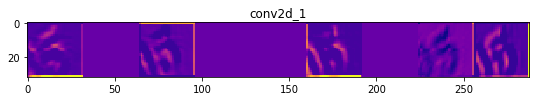

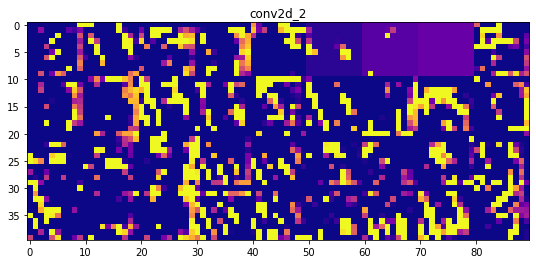

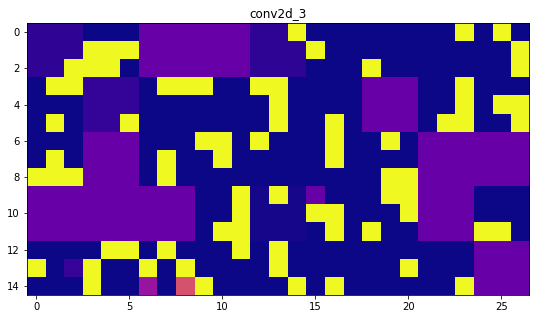

Label 6
13


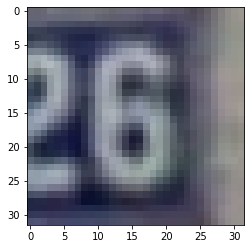

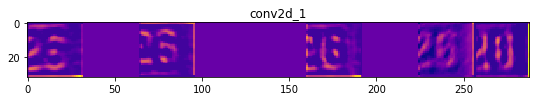

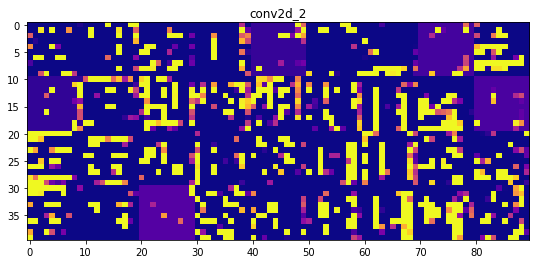

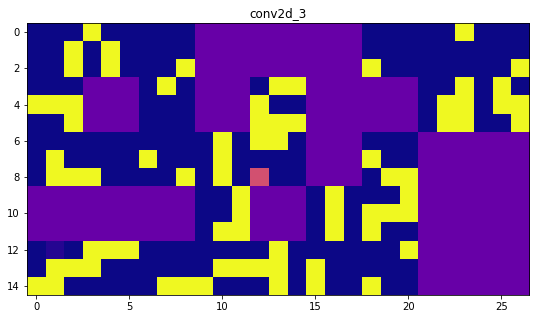

Label 7
3


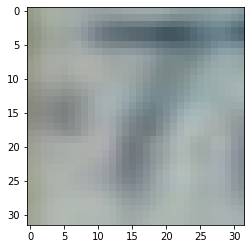

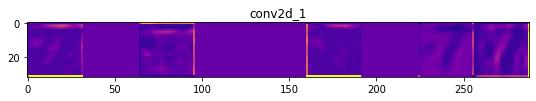

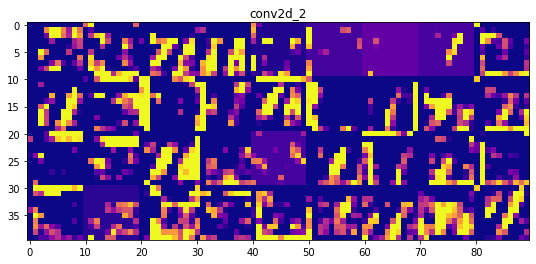

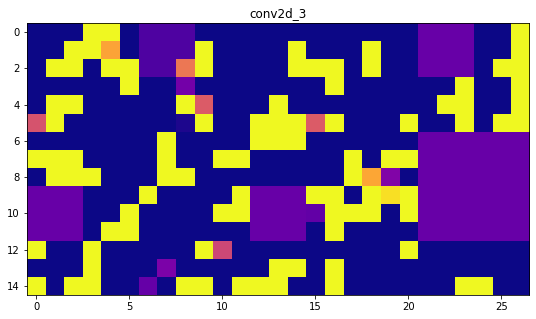

Label 8
0


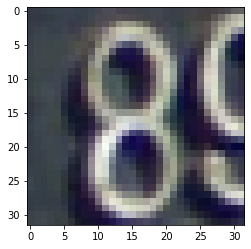

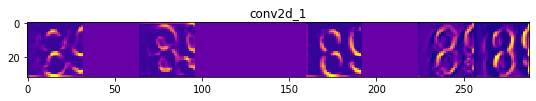

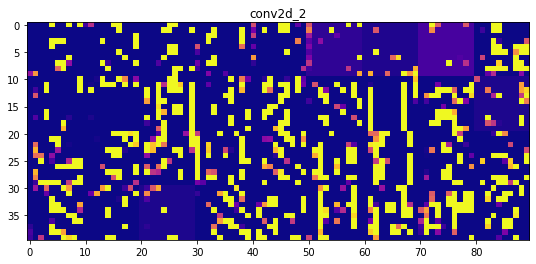

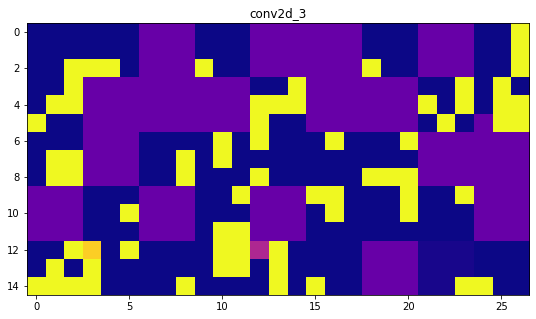

Label 9
10


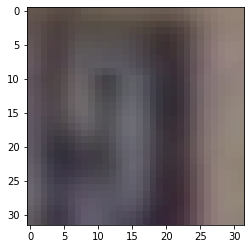

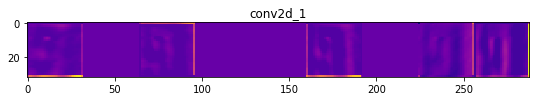

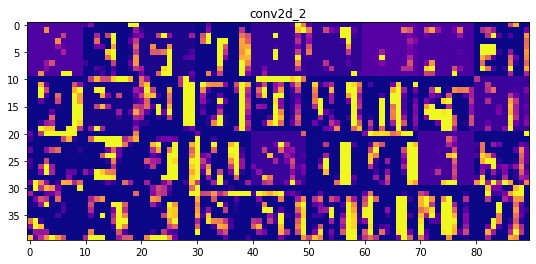

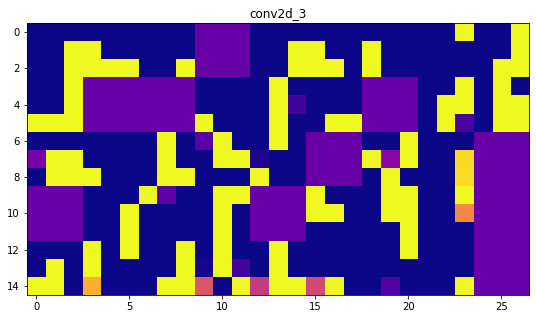

In [132]:
imagesRow = [3, 6, 7]
for i in range(0, 10):
    print("Label " + str(i))
    indexLabel = np.where(y_train_split == i)[0][0]
    print(indexLabel)
    img = x_train_split[indexLabel]
    plt.imshow(img)
    plt.show()
    visualizeConvolutionalFilters(img, 9)

### Exercise 3

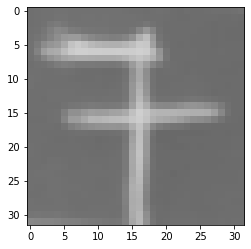

In [77]:
# test on self image
test_image = "test_digit7.jpg"
# load & smoothen image
kernel = np.ones((7,7), np.float32) / 49
image = cv.imread(test_image, cv.IMREAD_GRAYSCALE)
image = cv.filter2D(image, -1, kernel)
# make numpy array
image = np.array(image)
image = resize(image, (32,32,3))
# make negative
image = np.ones(image.shape) - image
plt.imshow(image, cmap="gray")
plt.show()

In [78]:
print(image.shape)
savedModel = m.load_model('cnn_model.h5')
# predict label
np.argmax(savedModel.predict(np.array([image])))

(32, 32, 3)


7